### Survival Analysis for Lung Cancer data 
* 1 : Male, 2 : Female

In [52]:
options(warn = -1)
knitr::opts_chunk$set(message = FALSE, warning = FALSE)  

In [83]:
library(survival)
library(survminer)
library(tidyverse)
library(ggplot2)
library(ggfortify)
library(multcomp)

In [54]:
df_lung <- lung

In [55]:
head(df_lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


### Compute Survival Curve

In [56]:
kmsurv <- survfit(Surv(time, status) ~ sex, data = df_lung)


### Median survival time and its Confidence interval  
* Median survival time is the time at which 50% of the subjects in a study have experienced the event 

In [57]:
kmsurv

Call: survfit(formula = Surv(time, status) ~ sex, data = df_lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550

In [58]:
summary(kmsurv)$table

,records,n.max,n.start,events,rmean,se(rmean),median,0.95LCL,0.95UCL
sex=1,138,138,138,112,326.0841,22.91156,270,212,310
sex=2,90,90,90,53,460.6473,34.68985,426,348,550


### Visualize Survival Curve

### 
Survival probability : 
* at time 0 it is 1,
* at time 250 it is 0.55 for male, and 0.75 for sex female

Median survival :
*  270 days for Male and 425 days for Female
*  good survival for femlae compared to male 

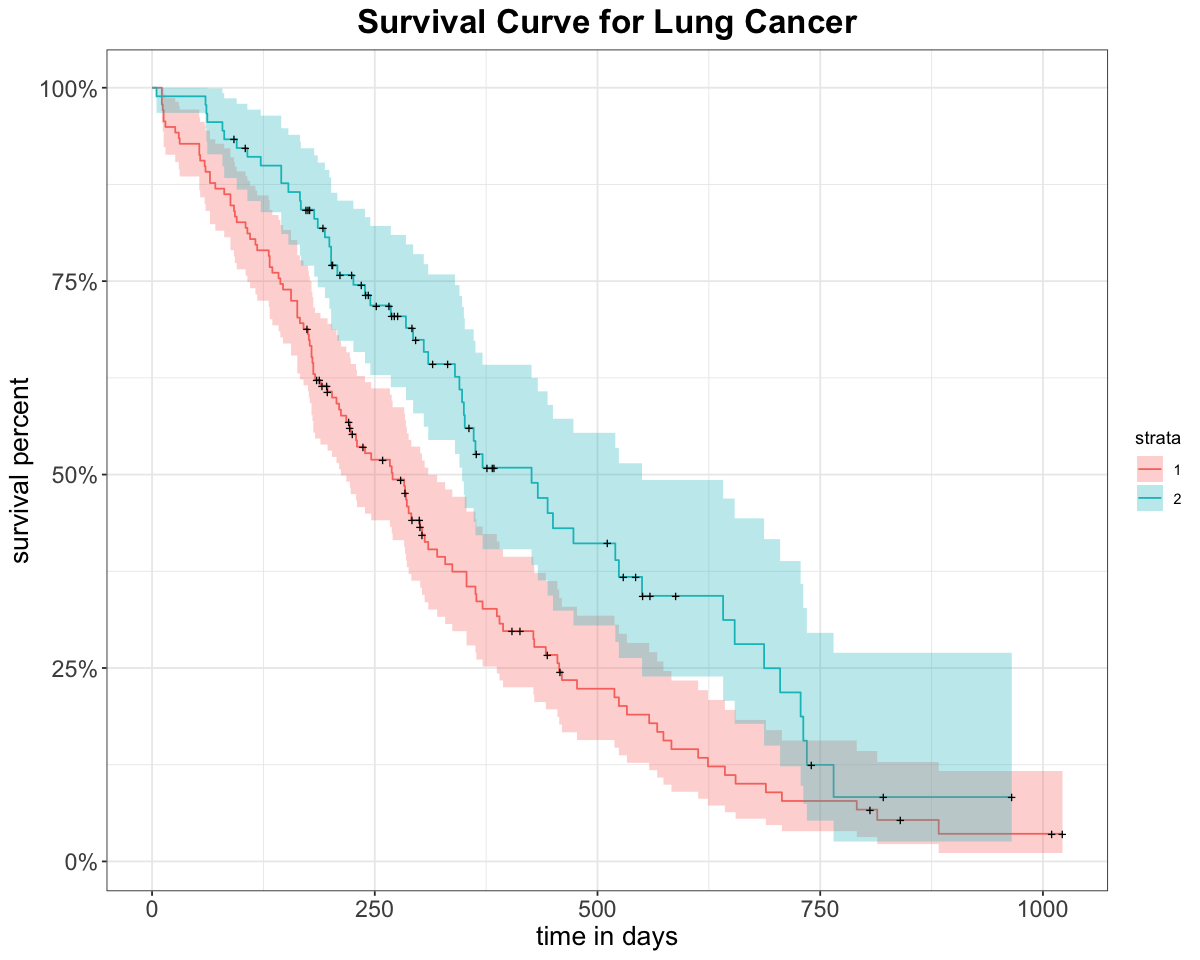

In [64]:
# Set figure size
options(repr.plot.width = 10, repr.plot.height = 8)


autoplot(kmsurv) + 
xlab('time in days') + 
ylab('survival percent') + 
labs(title = 'Survival Curve for Lung Cancer')+
theme_bw() + 
theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14), 
    axis.text.y = element_text(size = 14))

### Log Rank Test
* log-rank test is the most widely used method of comparing two or more survival curves.
* null hypothesis :  no difference in survival between the two groups.
* log rank test is a non-parametric test, which makes no assumptions about the survival distributions.

In [65]:
survdiff(Surv(time, status) ~ sex, data = df_lung, rho = 0)

Call:
survdiff(formula = Surv(time, status) ~ sex, data = df_lung, 
    rho = 0)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=1 138      112     91.6      4.55      10.3
sex=2  90       53     73.4      5.68      10.3

 Chisq= 10.3  on 1 degrees of freedom, p= 0.001 

* p-values less than 0.05 shows that there is difference in the survival rates for lung cancer for male and female. 

### Survival probability at different time points and its CI

In [66]:
summary(kmsurv, times=c(100, 250, 500, 750))

Call: survfit(formula = Surv(time, status) ~ sex, data = df_lung)

                sex=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  100    114      24   0.8261  0.0323        0.765        0.892
  250     62      41   0.5192  0.0433        0.441        0.611
  500     20      31   0.2232  0.0402        0.157        0.318
  750      7      13   0.0781  0.0276        0.039        0.156

                sex=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  100     82       7    0.922  0.0283       0.8683        0.979
  250     53      17    0.719  0.0490       0.6287        0.821
  500     21      18    0.411  0.0626       0.3050        0.554
  750      3      10    0.125  0.0549       0.0527        0.295


## Proportional Hazards Regression
* fit a proportional hazards regression model,
* estimate the effect of predictors (in terms of log hazards and hazard ratios),
* check model assumptions with diagnostic tools (plots, statistics)

### Model : Cox proportional hazards regression

In [68]:
# This model examines how sex affects survival time.
# sex is predictor variable
model_1 <- coxph(Surv(df_lung$time, df_lung$status) ~ sex, data = df_lung)
summary(model_1)

Call:
coxph(formula = Surv(df_lung$time, df_lung$status) ~ sex, data = df_lung)

  n= 228, number of events= 165 

       coef exp(coef) se(coef)      z Pr(>|z|)   
sex -0.5310    0.5880   0.1672 -3.176  0.00149 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
sex     0.588      1.701    0.4237     0.816

Concordance= 0.579  (se = 0.021 )
Likelihood ratio test= 10.63  on 1 df,   p=0.001
Wald test            = 10.09  on 1 df,   p=0.001
Score (logrank) test = 10.33  on 1 df,   p=0.001


### Interpretation of Cox proportional hazards regression

* p value : sex is significant 
* The model compares females (2) to males (1).
* Negative value (-0.53) means females (sex=2) have a lower risk of death compared to males.
* 0.588 is hazard ratio (HR)  : less than 1 (0.588), females are about 41.2% less likely to die compared to males.
* Confidence intervals of the hazard ratio
* Global statistical significance of the model : gives p-values for three alternative tests for overall significance of the model
* likelihood-ratio test, Wald test, and score logrank statistics
* Likelihood ratio test has better behavior for small sample sizes

### Checking the proportional hazards assumption

### What is the Cox PH Assumption?
* the effect of a predictor (sex) on survival is constant over time.
* this means that the hazard ratio (HR) does not change as time progresses.

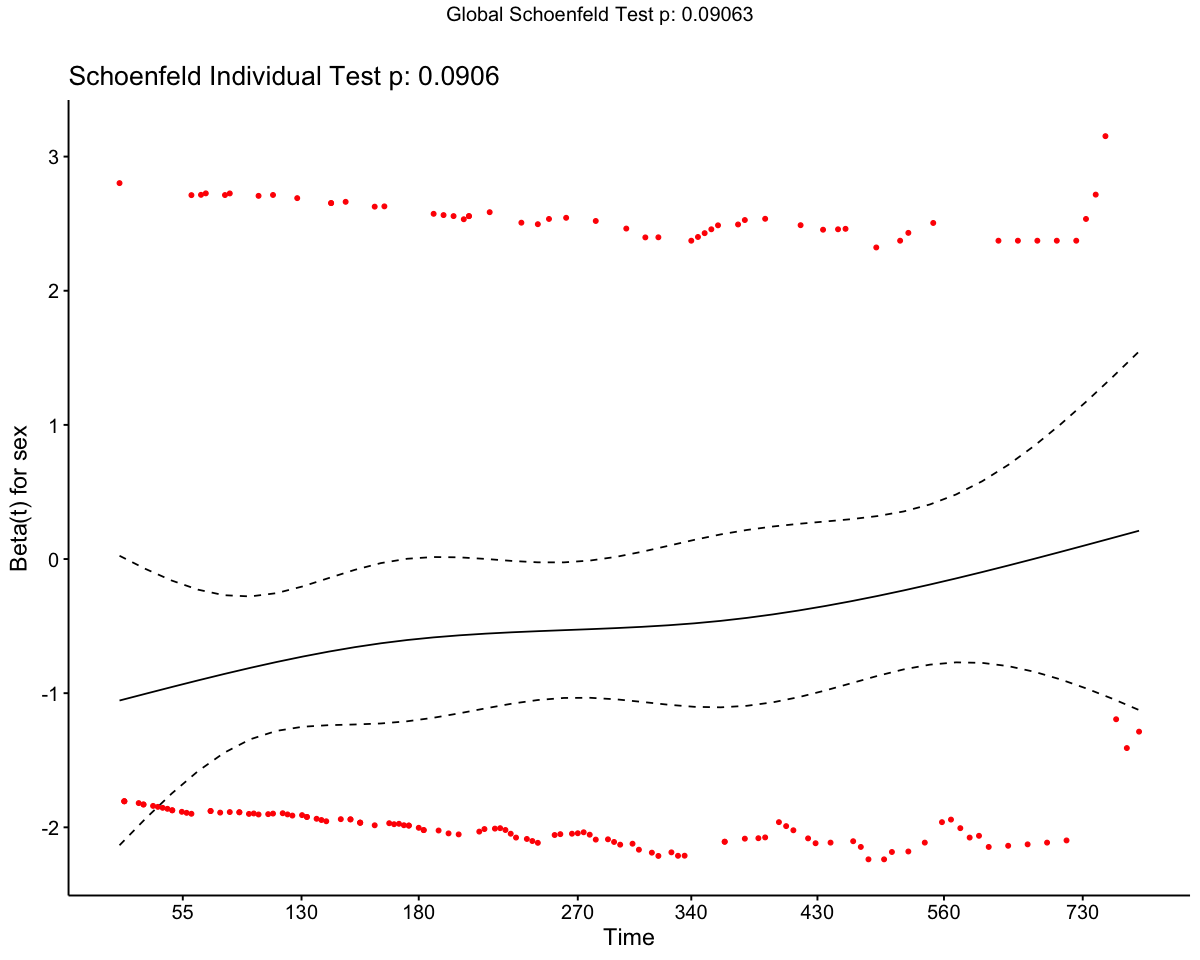

In [75]:
# choenfeld residuals verses time
sch.test = cox.zph(model_1)
ggcoxzph(sch.test)

### 
* If the residuals fluctuate randomly around zero (no pattern) → The PH assumption holds
* If the residuals show a trend (increase/decrease over time) → The PH assumption is violated
* p-value (0.09) which is more than 0.05 therefore the assumption is **not** violated

In [78]:
sch.test

       chisq df     p
sex     2.86  1 0.091
GLOBAL  2.86  1 0.091

###  Multiple Cox proportional hazards regression

In [79]:
model_2 <- coxph(Surv(time, status) ~ age + sex + ph.ecog, data =  df_lung)
summary(model_2)

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog, data = df_lung)

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

             coef exp(coef)  se(coef)      z Pr(>|z|)    
age      0.011067  1.011128  0.009267  1.194 0.232416    
sex     -0.552612  0.575445  0.167739 -3.294 0.000986 ***
ph.ecog  0.463728  1.589991  0.113577  4.083 4.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
age        1.0111     0.9890    0.9929    1.0297
sex        0.5754     1.7378    0.4142    0.7994
ph.ecog    1.5900     0.6289    1.2727    1.9864

Concordance= 0.637  (se = 0.025 )
Likelihood ratio test= 30.5  on 3 df,   p=1e-06
Wald test            = 29.93  on 3 df,   p=1e-06
Score (logrank) test = 30.5  on 3 df,   p=1e-06


### 
* The p-value for all three overall tests (likelihood, Wald, and score) are significant, indicating that the model is significant.

### Interpretation of Multivariate Cox model 
* sex and ph.ecog are significant
* age is not significant (p 0.23)
* Sex : holding the other covariates constant, being female (sex=2) reduces the hazard by a factor of 0.58 (Hazard ratio), or 42%
